# Selfish vs Standard System Prompt Comparison

This notebook compares experiment results between **Standard** and **Selfish** system prompts side-by-side.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict

# Load both datasets
df_standard = pd.read_csv('/Users/yuliav/cooperative_ai/results/all_runs_20251211_155037.csv')
df_selfish = pd.read_csv('/Users/yuliav/cooperative_ai/results/all_runs_20251211_155410.csv')

# Add label column to each
df_standard['Prompt Type'] = 'Standard'
df_selfish['Prompt Type'] = 'Selfish'

print(f"Standard dataset: {len(df_standard)} rows")
print(f"Selfish dataset: {len(df_selfish)} rows")

Standard dataset: 288 rows
Selfish dataset: 431 rows


In [4]:
# Helper function to map Config ID to friendly names
def map_config_label(config_id):
    if 'contract_for_finishing' in str(config_id):
        return 'Finishing Contract'
    elif 'contract_none' in str(config_id):
        return 'No Contract'
    elif 'contract_strict' in str(config_id):
        return 'Strict Contract'
    elif 'contract_tile_with_judge' in str(config_id):
        return 'Judge Contract'
    else:
        return 'Unknown'

# Apply mapping to both datasets
df_standard['Config Label'] = df_standard['Config ID'].apply(map_config_label)
df_selfish['Config Label'] = df_selfish['Config ID'].apply(map_config_label)

# Filter for Regular Trading (Context=True, Pay4Partner=False)
RT_standard = df_standard[(df_standard['Context'] == True) & (df_standard['Pay4Partner'] == False)].copy()
RT_selfish = df_selfish[(df_selfish['Context'] == True) & (df_selfish['Pay4Partner'] == False)].copy()

# Add success column
RT_standard['success'] = (RT_standard['Reached Goal Player 0'] == True) & (RT_standard['Reached Goal Player 1'] == True)
RT_selfish['success'] = (RT_selfish['Reached Goal Player 0'] == True) & (RT_selfish['Reached Goal Player 1'] == True)

print(f"Regular Trading - Standard: {len(RT_standard)} rows")
print(f"Regular Trading - Selfish: {len(RT_selfish)} rows")

Regular Trading - Standard: 288 rows
Regular Trading - Selfish: 431 rows


## 1. Proportion of Success by Bucket (No Contract) - Side by Side

/var/folders/vg/1dvt1w6x4dxfj0lf2f48nphc0000gn/T/ipykernel_76225/411241942.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/vg/1dvt1w6x4dxfj0lf2f48nphc0000gn/T/ipykernel_76225/411241942.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


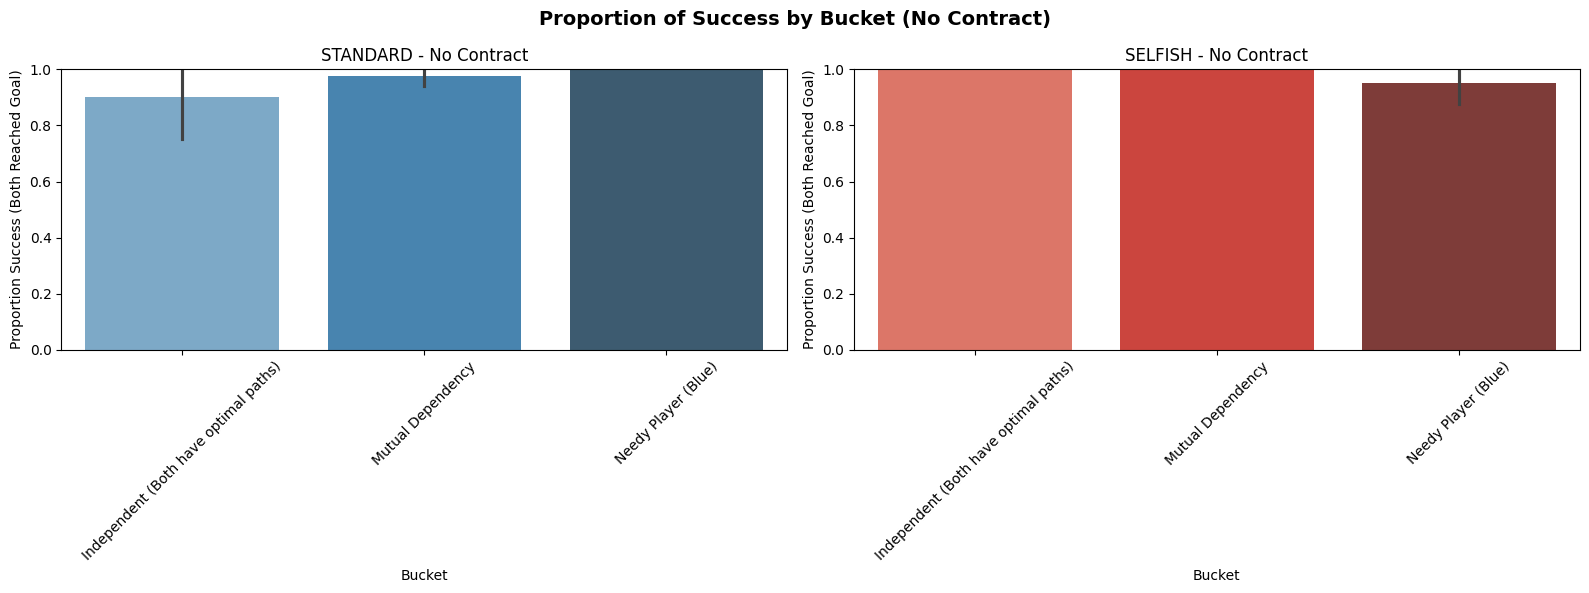

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Filter for No Contract
standard_none = RT_standard[RT_standard['Config ID'].str.contains('contract_none', na=False)]
selfish_none = RT_selfish[RT_selfish['Config ID'].str.contains('contract_none', na=False)]

# Standard plot
ax1 = axes[0]
sns.barplot(
    data=standard_none,
    x='Bucket',
    y='success',
    estimator='mean',
    errorbar='ci',
    palette='Blues_d',
    ax=ax1
)
ax1.set_ylabel('Proportion Success (Both Reached Goal)')
ax1.set_xlabel('Bucket')
ax1.set_title('STANDARD - No Contract')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, 1)

# Selfish plot
ax2 = axes[1]
sns.barplot(
    data=selfish_none,
    x='Bucket',
    y='success',
    estimator='mean',
    errorbar='ci',
    palette='Reds_d',
    ax=ax2
)
ax2.set_ylabel('Proportion Success (Both Reached Goal)')
ax2.set_xlabel('Bucket')
ax2.set_title('SELFISH - No Contract')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0, 1)

plt.suptitle('Proportion of Success by Bucket (No Contract)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 2. Proportion of Success by Bucket (Strict Contract) - Side by Side

/var/folders/vg/1dvt1w6x4dxfj0lf2f48nphc0000gn/T/ipykernel_76225/1078023173.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/vg/1dvt1w6x4dxfj0lf2f48nphc0000gn/T/ipykernel_76225/1078023173.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


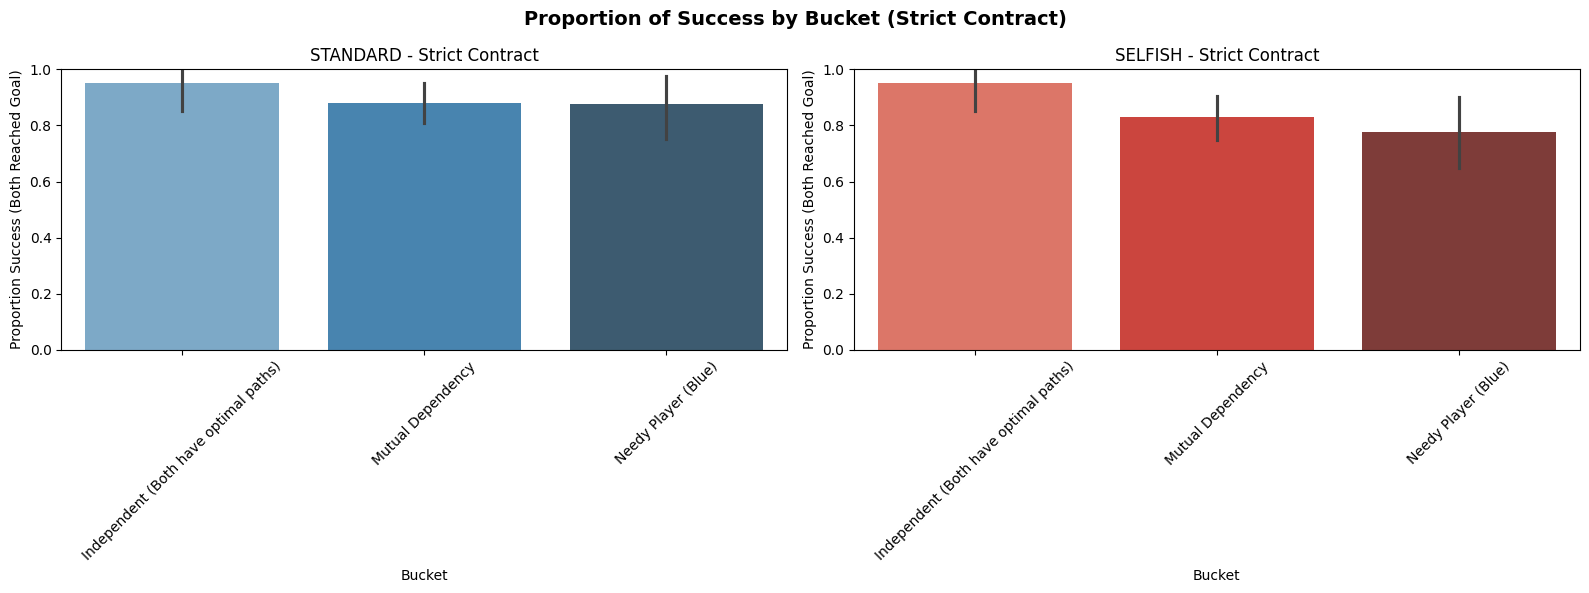

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Filter for Strict Contract
standard_strict = RT_standard[RT_standard['Config ID'].str.contains('contract_strict', na=False)]
selfish_strict = RT_selfish[RT_selfish['Config ID'].str.contains('contract_strict', na=False)]

# Standard plot
ax1 = axes[0]
sns.barplot(
    data=standard_strict,
    x='Bucket',
    y='success',
    estimator='mean',
    errorbar='ci',
    palette='Blues_d',
    ax=ax1
)
ax1.set_ylabel('Proportion Success (Both Reached Goal)')
ax1.set_xlabel('Bucket')
ax1.set_title('STANDARD - Strict Contract')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, 1)

# Selfish plot
ax2 = axes[1]
sns.barplot(
    data=selfish_strict,
    x='Bucket',
    y='success',
    estimator='mean',
    errorbar='ci',
    palette='Reds_d',
    ax=ax2
)
ax2.set_ylabel('Proportion Success (Both Reached Goal)')
ax2.set_xlabel('Bucket')
ax2.set_title('SELFISH - Strict Contract')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0, 1)

plt.suptitle('Proportion of Success by Bucket (Strict Contract)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 3. Success by Bucket and Contract Type - Side by Side

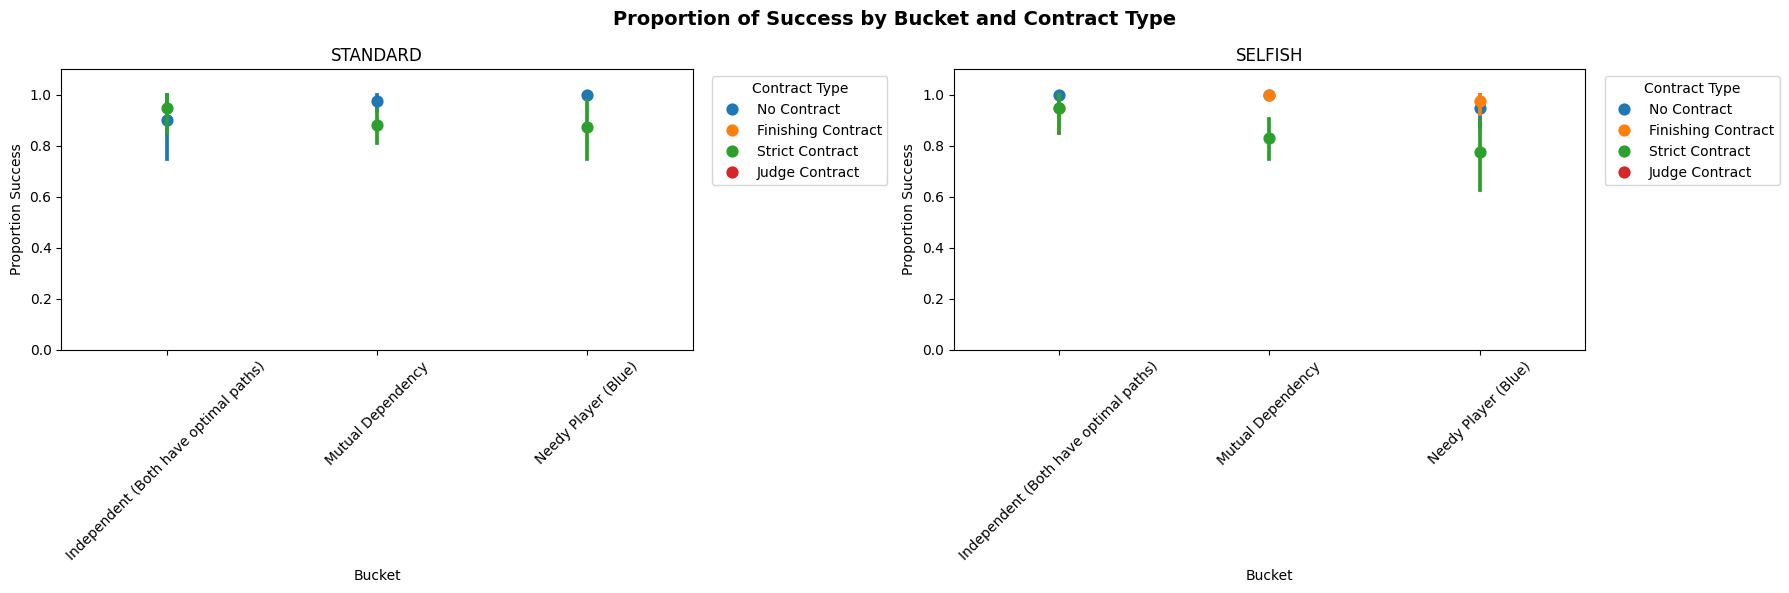

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

order = ["No Contract", "Finishing Contract", "Strict Contract", "Judge Contract"]

# Standard plot
RT_standard['Config Label'] = pd.Categorical(RT_standard['Config Label'], categories=order, ordered=True)
ax1 = axes[0]
sns.pointplot(
    data=RT_standard,
    x='Bucket',
    y='success',
    hue='Config Label',
    hue_order=order,
    errorbar='ci',
    linestyles='',
    ax=ax1
)
ax1.set_ylabel('Proportion Success')
ax1.set_xlabel('Bucket')
ax1.set_title('STANDARD')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, 1.1)
ax1.legend(title='Contract Type', bbox_to_anchor=(1.02, 1), loc='upper left')

# Selfish plot
RT_selfish['Config Label'] = pd.Categorical(RT_selfish['Config Label'], categories=order, ordered=True)
ax2 = axes[1]
sns.pointplot(
    data=RT_selfish,
    x='Bucket',
    y='success',
    hue='Config Label',
    hue_order=order,
    errorbar='ci',
    linestyles='',
    ax=ax2
)
ax2.set_ylabel('Proportion Success')
ax2.set_xlabel('Bucket')
ax2.set_title('SELFISH')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0, 1.1)
ax2.legend(title='Contract Type', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.suptitle('Proportion of Success by Bucket and Contract Type', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Average Player Scores by Contract Type (Needy Player Blue) - Side by Side

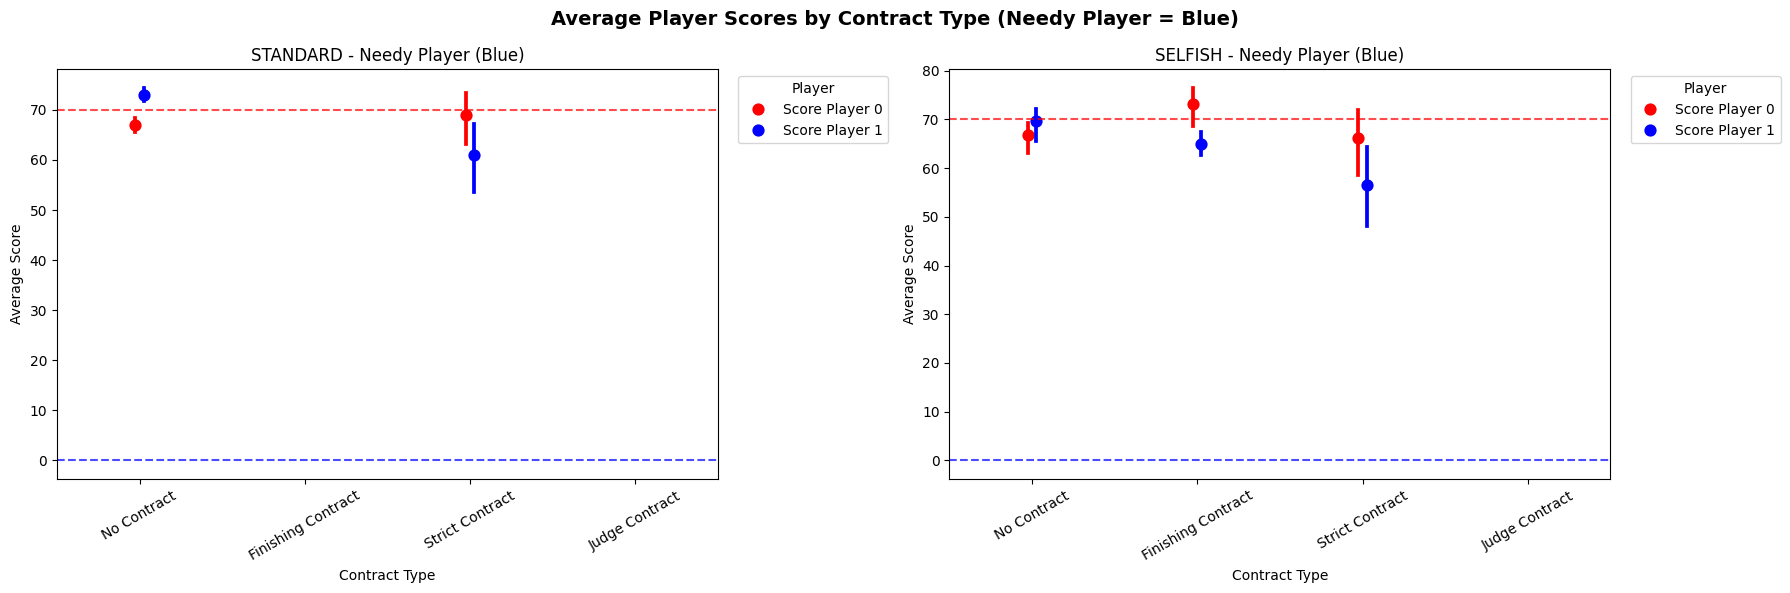

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

order = ["No Contract", "Finishing Contract", "Strict Contract", "Judge Contract"]

# Filter for Needy Player Blue bucket
subset_standard = RT_standard[RT_standard['Bucket'] == 'Needy Player (Blue)'].copy()
subset_selfish = RT_selfish[RT_selfish['Bucket'] == 'Needy Player (Blue)'].copy()

for subset, ax, title, palette in [
    (subset_standard, axes[0], 'STANDARD', {'Score Player 0': 'red', 'Score Player 1': 'blue'}),
    (subset_selfish, axes[1], 'SELFISH', {'Score Player 0': 'red', 'Score Player 1': 'blue'})
]:
    subset['Config Label'] = pd.Categorical(subset['Config Label'], categories=order, ordered=True)
    
    # Reshape to long format
    df_long = subset.melt(
        id_vars=['Config Label'],
        value_vars=['Score Player 0', 'Score Player 1'],
        var_name='Player',
        value_name='Score'
    )
    
    # Compute baselines
    baseline_p0 = subset['Non-Cooperative Baseline Player 0'].mean() if len(subset) > 0 else 0
    baseline_p1 = subset['Non-Cooperative Baseline Player 1'].mean() if len(subset) > 0 else 0
    
    sns.pointplot(
        data=df_long,
        x='Config Label',
        y='Score',
        hue='Player',
        order=order,
        errorbar='ci',
        dodge=True,
        markers='o',
        linestyles='',
        palette=palette,
        ax=ax
    )
    
    ax.axhline(y=baseline_p0, color=palette['Score Player 0'], linestyle='--', alpha=0.7)
    ax.axhline(y=baseline_p1, color=palette['Score Player 1'], linestyle='--', alpha=0.7)
    ax.set_ylabel('Average Score')
    ax.set_xlabel('Contract Type')
    ax.set_title(f'{title} - Needy Player (Blue)')
    ax.tick_params(axis='x', rotation=30)
    ax.legend(title='Player', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.suptitle('Average Player Scores by Contract Type (Needy Player = Blue)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

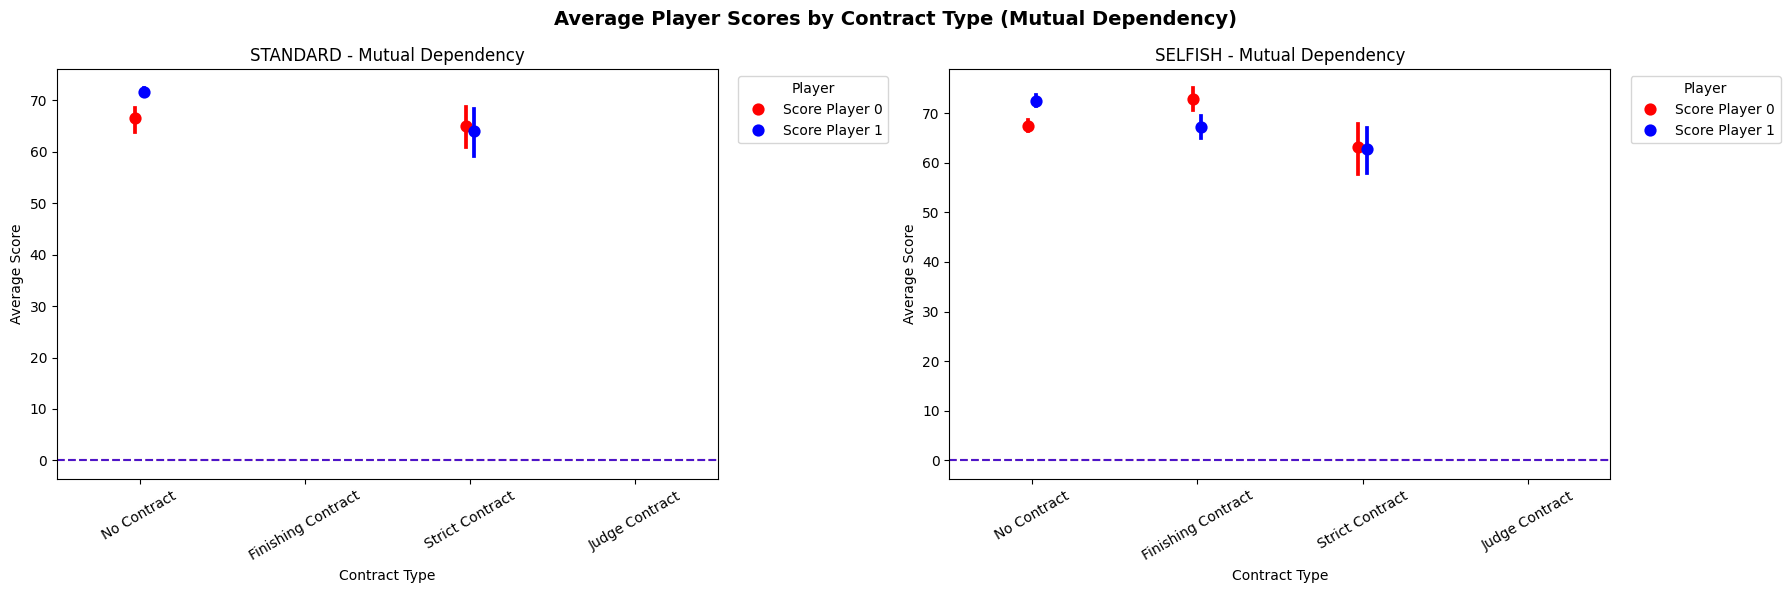

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

order = ["No Contract", "Finishing Contract", "Strict Contract", "Judge Contract"]

# Filter for Needy Player Blue bucket
subset_standard = RT_standard[RT_standard['Bucket'] == 'Mutual Dependency'].copy()
subset_selfish = RT_selfish[RT_selfish['Bucket'] == 'Mutual Dependency'].copy()

for subset, ax, title, palette in [
    (subset_standard, axes[0], 'STANDARD', {'Score Player 0': 'red', 'Score Player 1': 'blue'}),
    (subset_selfish, axes[1], 'SELFISH', {'Score Player 0': 'red', 'Score Player 1': 'blue'})
]:
    subset['Config Label'] = pd.Categorical(subset['Config Label'], categories=order, ordered=True)
    
    # Reshape to long format
    df_long = subset.melt(
        id_vars=['Config Label'],
        value_vars=['Score Player 0', 'Score Player 1'],
        var_name='Player',
        value_name='Score'
    )
    
    # Compute baselines
    baseline_p0 = subset['Non-Cooperative Baseline Player 0'].mean() if len(subset) > 0 else 0
    baseline_p1 = subset['Non-Cooperative Baseline Player 1'].mean() if len(subset) > 0 else 0
    
    sns.pointplot(
        data=df_long,
        x='Config Label',
        y='Score',
        hue='Player',
        order=order,
        errorbar='ci',
        dodge=True,
        markers='o',
        linestyles='',
        palette=palette,
        ax=ax
    )
    
    ax.axhline(y=baseline_p0, color=palette['Score Player 0'], linestyle='--', alpha=0.7)
    ax.axhline(y=baseline_p1, color=palette['Score Player 1'], linestyle='--', alpha=0.7)
    ax.set_ylabel('Average Score')
    ax.set_xlabel('Contract Type')
    ax.set_title(f'{title} - Mutual Dependency')
    ax.tick_params(axis='x', rotation=30)
    ax.legend(title='Player', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.suptitle('Average Player Scores by Contract Type (Mutual Dependency)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 6. Zero Score Analysis - Both Players Get 0 Score

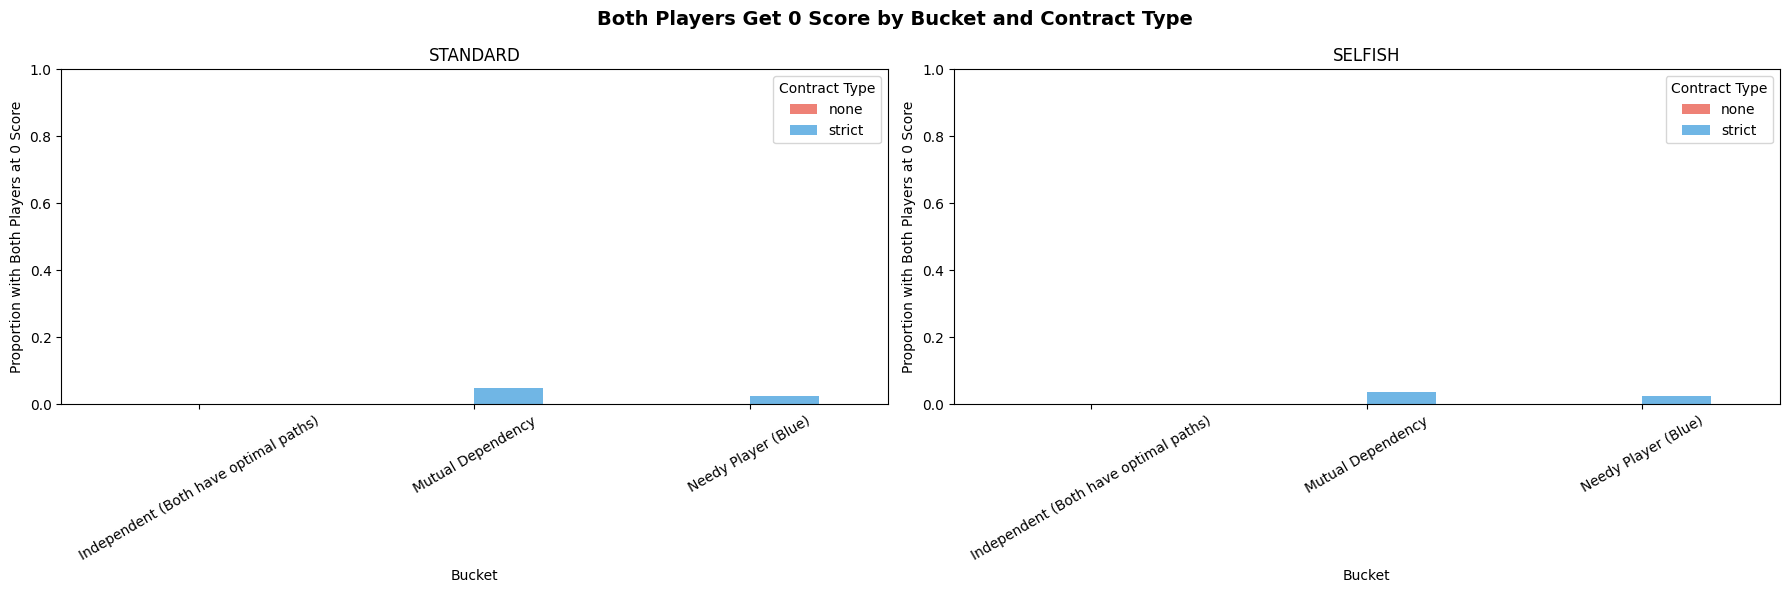

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for data, ax, title in [
    (RT_standard, axes[0], 'STANDARD'),
    (RT_selfish, axes[1], 'SELFISH')
]:
    data = data.copy()
    data['Contract Type Clean'] = data['Contract Type'].fillna('none')
    
    # Calculate zero scores
    data['Both Zero'] = (data['Score Player 0'] == 0) & (data['Score Player 1'] == 0)
    
    zero_scores = data.groupby(['Bucket', 'Contract Type Clean']).agg({
        'Both Zero': 'mean'
    }).reset_index()
    
    # Filter to specific contract types
    zero_scores = zero_scores[zero_scores['Contract Type Clean'].isin(['none', 'strict'])]
    
    pivot = zero_scores.pivot(index='Bucket', columns='Contract Type Clean', values='Both Zero')
    pivot.plot(kind='bar', rot=30, color=['#e74c3c', '#3498db'], alpha=0.7, ax=ax)
    ax.set_title(title)
    ax.set_ylabel('Proportion with Both Players at 0 Score')
    ax.set_xlabel('Bucket')
    ax.legend(title='Contract Type')
    ax.set_ylim(0, 1)

plt.suptitle('Both Players Get 0 Score by Bucket and Contract Type', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 7. Summary Statistics Comparison

In [19]:
# Create summary comparison table
def compute_summary(data, label):
    return pd.DataFrame({
        'Prompt Type': label,
        'Total Runs': len(data),
        'Success Rate': data['success'].mean(),
        'Avg Total Score': data['Total Score'].mean(),
        'Avg Score P0': data['Score Player 0'].mean(),
        'Avg Score P1': data['Score Player 1'].mean(),
        'Avg Gini': data['Gini'].mean(),
        'Avg Trades Proposed': data['Total Trades Proposed'].mean(),
        'Avg Trades Accepted': data['Total Trades Accepted'].mean(),
        'Both Zero Rate': ((data['Score Player 0'] == 0) & (data['Score Player 1'] == 0)).mean()
    }, index=[0])

summary_standard = compute_summary(RT_standard, 'Standard')
summary_selfish = compute_summary(RT_selfish, 'Selfish')

summary = pd.concat([summary_standard, summary_selfish], ignore_index=True)
summary = summary.set_index('Prompt Type').T
summary['Difference'] = summary['Selfish'] - summary['Standard']
summary['% Change'] = ((summary['Selfish'] - summary['Standard']) / summary['Standard'] * 100).round(2)

print("=" * 80)
print("SUMMARY STATISTICS COMPARISON")
print("=" * 80)
display(summary.round(4))

SUMMARY STATISTICS COMPARISON


Prompt Type,Standard,Selfish,Difference,% Change
Total Runs,288.0000,431.0000,143.0000,49.65
Success Rate,0.9306,0.9350,0.0045,0.48
Avg Total Score,134.1667,134.8492,0.6825,0.51
Avg Score P0,66.5104,68.1926,1.6822,2.53
Avg Score P1,67.6562,66.6566,-0.9996,-1.48
Avg Gini,0.0532,0.0608,0.0076,14.30
Avg Trades Proposed,1.1076,1.4640,0.3564,32.18
Avg Trades Accepted,0.6493,0.9234,0.2741,42.22
Both Zero Rate,0.0174,0.0093,-0.0081,-46.54
